# Interactive investigation of the Temperature12k reconstruction

This notebook can be used to investigate the different latitudinal bands. Run it in your webbrowser using mybinder.org 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Chilipp/gridding-temp12k-viewer/master?filepath=investigate_reconstruction.ipynb)

Select the band you want to investigate by setting the `BAND` variable and in the menubar select click *Cell* > *Run All* to run the notebook. Then have a look into the visualization [at the bottom](#visualization) of this site. See also the following demo movie for a quick demonstration.

<video src="./tutorial.mp4" controls="" width="700">
      Your browser does not support the <code>video</code> element.
</video>

In [1]:
BAND = 45  # choose one of -75, -45, -15, 15, 45, 75

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML, clear_output, Video
import cartopy.crs as ccrs
import cartopy.feature as cf
from scatterplot_widget import ScatterplotWidget

## Configure the notebook

In [3]:
pd.set_option('display.max_colwidth', None)
%matplotlib notebook

## Read the data and select the columns to keep

In [4]:
df = pd.read_csv(f'data/annual_with_single_seas-{BAND}degN.tsv', '\t')

In [5]:
df = df[['clon', 'clat', 'time', 'temperature',
       'time_needed', 'nsamples', 'lon', 'lat', 'dataSetName',
       'TSid', 'seasonality', 'datum', 'proxy', 'age_unc', 'temp_unc',
       'modern', 'aligned', 'alignment_base',
       'temperature_anomaly_ref', 'lipdverse']]

In [6]:
df['lipdverse'] = '<a href="' + df.lipdverse + '">Link</a>'

## Visualization <div id="visualization"></div>

<IPython.core.display.Javascript object>


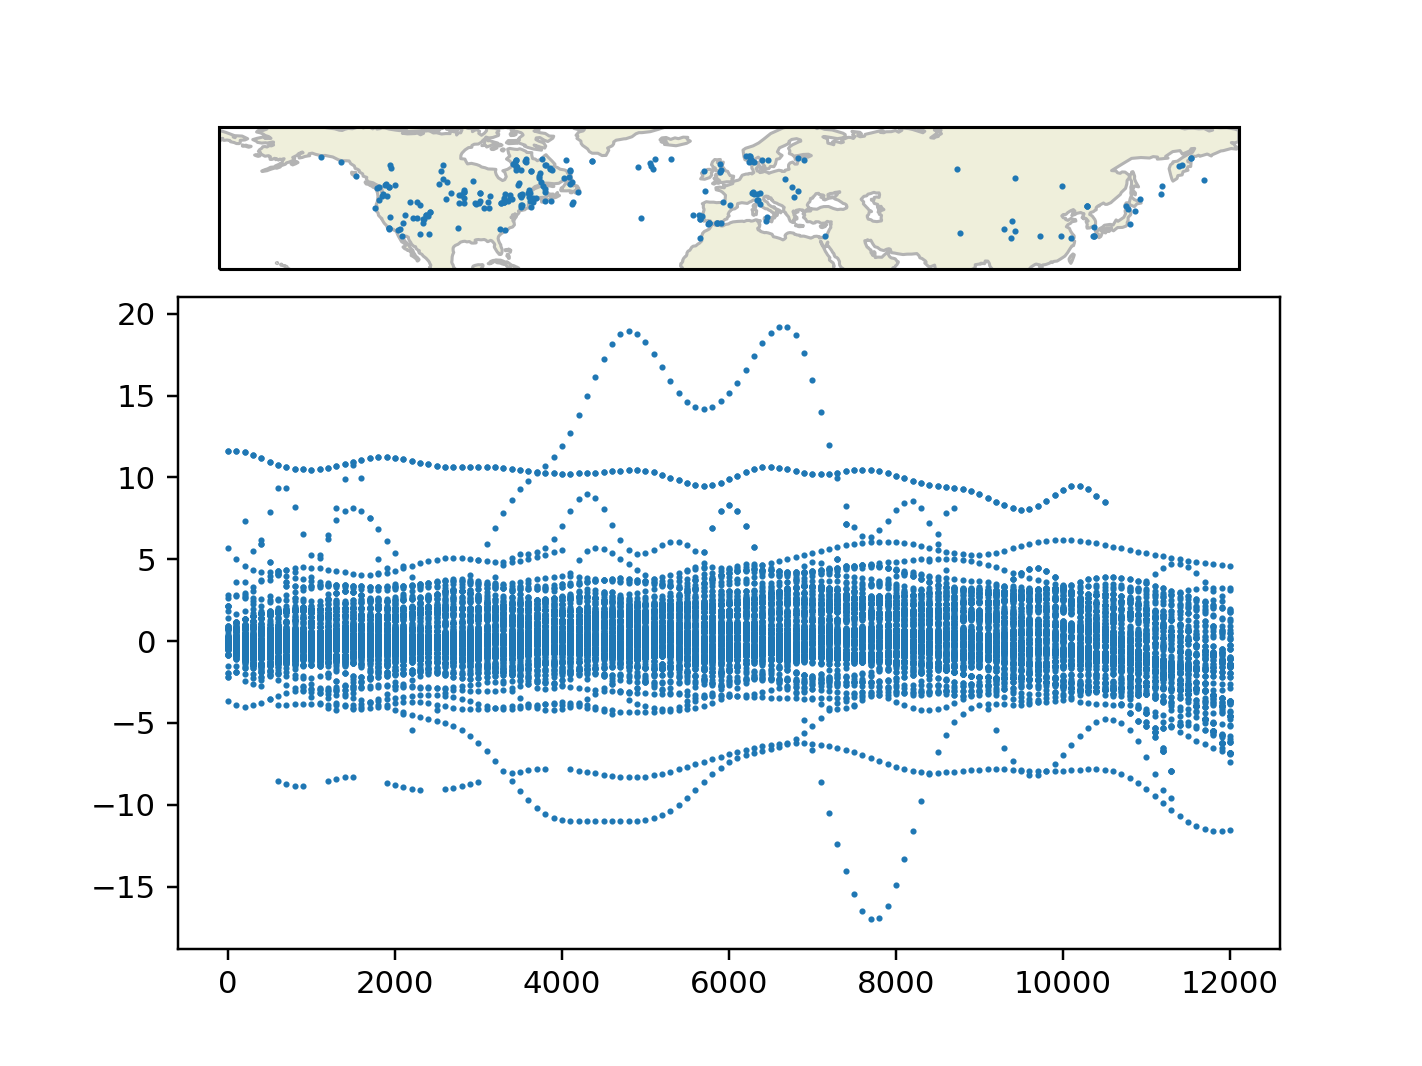

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<IPython.core.display.HTML object>', '…

In [7]:
plt.close('all')
fig = plt.figure()
scatter_ax = plt.subplot2grid((5, 1), (1, 0), 4, 1)
map_ax = plt.subplot2grid((5, 1), (0, 0), 1, 1, projection=ccrs.PlateCarree())

map_ax.add_feature(cf.LAND, ec='0.7')
map_ax.set_extent([-180, 180, 20, 70])


points_lasso = ScatterplotWidget(df, scatter_ax, map_ax)